# Import necessary packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# Loading Data from Google Drive
Images in the original dataset have been converted into 256*256 .png format

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!ls "/content/gdrive/My Drive"

'Colab Notebooks'			      test.csv
 DMML2_CA_Breast_Cancer_Detection_CNN.ipynb   testing_images
 RSNA_256				      testing_images.zip
 RSNA_256_2000				      train_2000.csv
 RSNA_256_2000.zip			      train.csv
 RSNA_256.zip


In [4]:
#!unzip "/content/gdrive/My Drive/RSNA_256_2000.zip" -d "/content/gdrive/My Drive/RSNA_256_2000/"

In [5]:
!ls "/content/gdrive/My Drive"

'Colab Notebooks'			      test.csv
 DMML2_CA_Breast_Cancer_Detection_CNN.ipynb   testing_images
 RSNA_256				      testing_images.zip
 RSNA_256_2000				      train_2000.csv
 RSNA_256_2000.zip			      train.csv
 RSNA_256.zip


In [6]:
df_train = pd.read_csv('/content/gdrive/My Drive/train.csv')
df_test = pd.read_csv('/content/gdrive/My Drive/test.csv')
#df_train.info()
print(df_train.head())
#df_test.info()
#print(df_test.head())
df_train['cancer'].unique()
df_train['cancer'].value_counts()

   site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
0        2       10006   462822612          L   CC  61.0       0       0   
1        2       10006  1459541791          L  MLO  61.0       0       0   
2        2       10006  1864590858          R  MLO  61.0       0       0   
3        2       10006  1874946579          R   CC  61.0       0       0   
4        2       10011   220375232          L   CC  55.0       0       0   

   invasive  BIRADS  implant density  machine_id  difficult_negative_case  
0         0     NaN        0     NaN          29                    False  
1         0     NaN        0     NaN          29                    False  
2         0     NaN        0     NaN          29                    False  
3         0     NaN        0     NaN          29                    False  
4         0     0.0        0     NaN          21                     True  


0    53548
1     1158
Name: cancer, dtype: int64

In [7]:
sorted_df_train = df_train.sort_values(by =['patient_id'], ascending=True)
#print(sorted_df_train.head())
df_train_2000 = sorted_df_train.iloc[:2000]

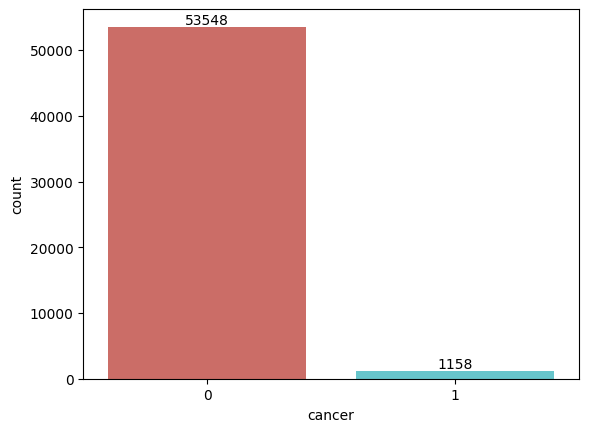

Percentage of Positive is: 97.8832303586444
Percentage of Malignant is: 2.11676964135561


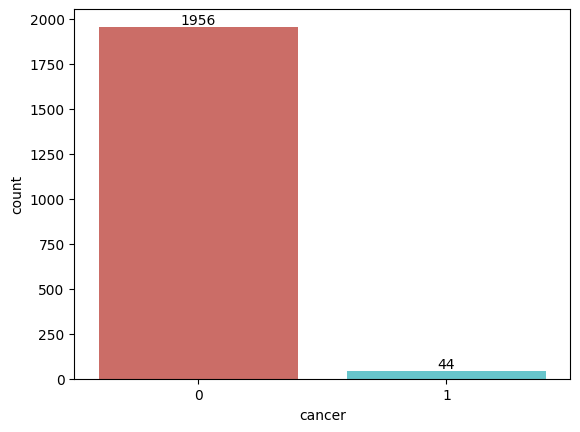

Percentage of Positive is: 97.8832303586444
Percentage of Malignant is: 2.11676964135561


In [8]:
import seaborn as sns # boxplot, histplot

def plot_precentage(df):
  ax=sns.countplot(x='cancer', data=df, palette='hls')
  plt.bar_label(ax.containers[0])
  plt.show()
  count_positive = len(df_train[df_train['cancer']==0])
  count_malignant = len(df_train[df_train['cancer']==1])
  pct_of_positive = count_positive/(count_positive+count_malignant)
  print("Percentage of Positive is:", pct_of_positive*100)
  pct_of_malignant = count_malignant/(count_positive+count_malignant)
  print("Percentage of Malignant is:", pct_of_malignant*100)

plot_precentage(df_train)
plot_precentage(df_train_2000)

In [9]:
# The latest keras-preprocessing
# Source Code: https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
# Modified by Jia Lin
!pip install git+https://github.com/keras-team/keras-preprocessing.git

  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-_60x53bw
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-_60x53bw
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py) ... done


# Keras ImageDataGenerator to map the images in the RSNA_256 directory to the class cancer in the corresponing train.csv file

In [10]:
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

In [11]:
# Create image_name matching the name in the image name directory by concatenating the patient_id and image_id
#df_train['image_name'] = df_train["patient_id"].astype(str) + '_' + df_train["image_id"].astype(str)
df_test['image_name'] = df_test["patient_id"].astype(str) + '_' + df_test["image_id"].astype(str)

#print(df_train.head())
#print(df_test.head())

df_train_2000['image_name'] = df_train_2000["patient_id"].astype(str) + '_' + df_train_2000["image_id"].astype(str)
print(df_train_2000.head())
#df_train_2000.loc[df_train_2000['patient_id']+'_'+df_train_2000['image_id']]=df_train_2000['image_name']

       site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
37282        2           5   640805896          L  MLO  68.0       0       0   
37283        2           5  1351088028          L   CC  68.0       0       0   
37284        2           5   940388076          R   CC  68.0       0       0   
37285        2           5  1633417959          R  MLO  68.0       0       0   
14042        1          25  1962456803          R  MLO  62.0       0       0   

       invasive  BIRADS  implant density  machine_id  difficult_negative_case  \
37282         0     0.0        0     NaN          21                     True   
37283         0     0.0        0     NaN          21                     True   
37284         0     NaN        0     NaN          21                    False   
37285         0     NaN        0     NaN          21                    False   
14042         0     1.0        0       B          49                    False   

          image_name  
37282    

<ipython-input-11-3fe73e358244>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2000['image_name'] = df_train_2000["patient_id"].astype(str) + '_' + df_train_2000["image_id"].astype(str)


In [12]:
# The append_ext function is defined to append extension to the image name
def append_ext(fname):
    return fname+'.png'
#df_train['image_name']=df_train['image_name'].apply(append_ext)
df_test['image_name']=df_test['image_name'].apply(append_ext)

#print(df_train.head())
print(df_test.head())

df_train_2000['image_name']=df_train_2000['image_name'].apply(append_ext)
print(df_train_2000.head())

   site_id  patient_id    image_id laterality view  age  implant  machine_id  \
0        2       10008   736471439          L  MLO   81        0          21   
1        2       10008  1591370361          L   CC   81        0          21   
2        2       10008    68070693          R  MLO   81        0          21   
3        2       10008   361203119          R   CC   81        0          21   

  prediction_id            image_name  
0       10008_L   10008_736471439.png  
1       10008_L  10008_1591370361.png  
2       10008_R    10008_68070693.png  
3       10008_R   10008_361203119.png  
       site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
37282        2           5   640805896          L  MLO  68.0       0       0   
37283        2           5  1351088028          L   CC  68.0       0       0   
37284        2           5   940388076          R   CC  68.0       0       0   
37285        2           5  1633417959          R  MLO  68.0       0       0   

<ipython-input-12-560e88196bdc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2000['image_name']=df_train_2000['image_name'].apply(append_ext)


In [13]:
!ls "/content/gdrive/My Drive/testing_images"

10008_1591370361.png  10008_68070693.png
10008_361203119.png   10008_736471439.png


# Split the RSNA_256 set into two dataset, one is training set, the other is validation set. The training set contains 75% of images, while the validation set is composed of 25% of images.

The batch_size of the training set and the validation set has set as the number that divides the total number of images in the train set and valid respectively.

In [14]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)
train_generator=datagen.flow_from_dataframe(dataframe=df_train_2000,
                                            directory="/content/gdrive/My Drive/RSNA_256/",
                                            x_col="image_name",
                                            y_col="cancer",
                                            subset="training",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="raw", # 'cancer' is numerical datatype
                                            target_size=(256,256))
valid_generator=datagen.flow_from_dataframe(dataframe=df_train_2000,
                                            directory="/content/gdrive/My Drive/RSNA_256/",
                                            x_col="image_name",
                                            y_col="cancer",
                                            subset="validation",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="raw", # 'cancer' is numerical datatype
                                            target_size=(256,256))

Found 1500 validated image filenames.
Found 500 validated image filenames.


In [62]:
#print(df_test.head())
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(dataframe=df_test,
                                                directory="/content/gdrive/My Drive/testing_images/",
                                                x_col="image_name",
                                                y_col=None,
                                                batch_size=1,
                                                seed=42,
                                                shuffle=False,
                                                class_mode=None,
                                                target_size=(256,256))

Found 4 validated image filenames.


# Build the model:

In [21]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax')) # Two classes output

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 127, 127, 32)      0         
                                                      

In [80]:
from sklearn import metrics
import tensorflow as tf
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [81]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy", auc])

# Fitting/Training the model

In [24]:
model.fit(train_generator, validation_data=valid_generator, epochs=10)

Epoch 1/10
47/47 [==============================] - 816s 17s/step - loss: 0.2149 - accuracy: 0.9700 - val_loss: 0.1060 - val_accuracy: 0.9840
Epoch 2/10
47/47 [==============================] - 805s 17s/step - loss: 0.1280 - accuracy: 0.9760 - val_loss: 0.0909 - val_accuracy: 0.9840
Epoch 3/10
47/47 [==============================] - 798s 17s/step - loss: 0.1243 - accuracy: 0.9760 - val_loss: 0.0956 - val_accuracy: 0.9840
Epoch 4/10
47/47 [==============================] - 793s 17s/step - loss: 0.1081 - accuracy: 0.9760 - val_loss: 0.1171 - val_accuracy: 0.9840
Epoch 5/10
47/47 [==============================] - 805s 17s/step - loss: 0.1193 - accuracy: 0.9760 - val_loss: 0.1100 - val_accuracy: 0.9840
Epoch 6/10
47/47 [==============================] - 795s 17s/step - loss: 0.0923 - accuracy: 0.9760 - val_loss: 0.1941 - val_accuracy: 0.9820
Epoch 7/10
47/47 [==============================] - 808s 17s/step - loss: 0.0661 - accuracy: 0.9780 - val_loss: 0.1440 - val_accuracy: 0.9840
Epoch 

# Evaluate the model


In [27]:
model.evaluate(valid_generator)

16/16 [==============================] - 59s 4s/step - loss: 0.4285 - accuracy: 0.9840


[0.42849200963974, 0.984000027179718]

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(valid_generator.labels, y_pred)
print(confusion_matrix)

target_names = ['Benign','Malign']
print(classification_report(valid_generator.labels, y_pred, target_names=target_names, zero_division=0))

16/16 [==============================] - 71s 4s/step
Confusion Matrix
[[492   0]
 [  8   0]]
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       492
      Malign       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



# Predict the output

In [67]:
filenames = test_generator.filenames
number_test_samples = len(filenames)
pred = model.predict(test_generator, number_test_samples)
pred = np.argmax(pred, axis = 1)
print(pred)

4/4 [==============================] - 1s 233ms/step
[0 0 0 0]
